/usr/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.25.2) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


importing Jupyter notebook from planta.ipynb
R2a = 33000.0
R2b = 39000.0
R1 = 17875.0
R1 = 68000.0
C1 = 7e-07
C2 = 1e-07
wn = 17.254152413997854

        1.175e+04
-------------------------
s^2 + 100.9 s + 1.175e+04

T.size: 100
T.shape: (100,)
yout.size: 100
yout.shape: (100,)
{
    "RiseTime": 0.014011321365033157,
    "SettlingTime": 0.049039624777616045,
    "SettlingMin": 0.9277838533587892,
    "SettlingMax": 1.1913022492293326,
    "Overshoot": 19.24899706442737,
    "Undershoot": 0.0,
    "Peak": 1.1913022492293326,
    "PeakTime": 0.03222603913957626,
    "SteadyStateValue": 0.9990039988224811
}
v0 = 1.0 v
vinf = 1.49 v
deltav = 0.49 v
v10 = 1.049 v
v90 = 1.441 v
t10 = 0.0048 s
t90 = 0.0198 s
RiseTime = 0.015000000000000003 s
deltav = 0.49 v
v50 = 1.245 v
Delay = 0.012 s
PeakTime = 0.0334 s
PeakValue = 1.57 v
OverShoot = 16.326530612244913 %
sup_margin = 1.5145 v
inf_margin = 1.4655 v
SettlingTime = 0.0476 s
zeta = 0.4997062054306522
wn = 108.58948003681807
zeta_check = 0.4997

/usr/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


Gd(z) = 
4.149 z^2 - 7.825 z + 3.722
---------------------------
  z^2 - 1.641 z + 0.6412

dt = 0.001


-> Sem controlador:
{
    "RiseTime": 0.015636573668080363,
    "SettlingTime": 0.050818864421261184,
    "SettlingMin": 0.9339053112958997,
    "SettlingMax": 1.160441046696975,
    "Overshoot": 16.101438379329213,
    "Undershoot": 0.0,
    "Peak": 1.160441046696975,
    "PeakTime": 0.03518229075318082,
    "SteadyStateValue": 0.9995061757164077
}

-> Com controlador:
{
    "RiseTime": 0.009000000000000001,
    "SettlingTime": 0.026000000000000002,
    "SettlingMin": 0.9027008702790962,
    "SettlingMax": 1.0770360467125784,
    "Overshoot": 7.702625114499258,
    "Undershoot": 0.0,
    "Peak": 1.0770360467125784,
    "PeakTime": 0.021,
    "SteadyStateValue": 1.0000090950128424
}

-> Requisitos:
{
    "SettlingTime": 0.025409432210630592,
    "Overshoot": 8.050719189664607
}

-> Requisitos com fator:
{
    "SettlingTime": 0.02475790830779391,
    "Overshoot": 8.044706063997465
}
T

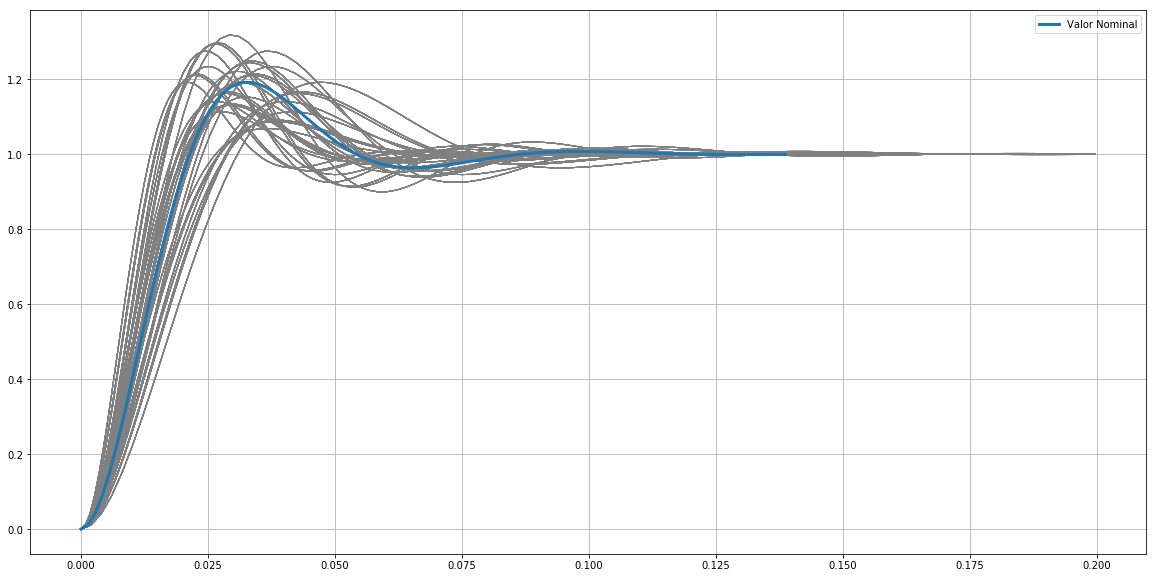

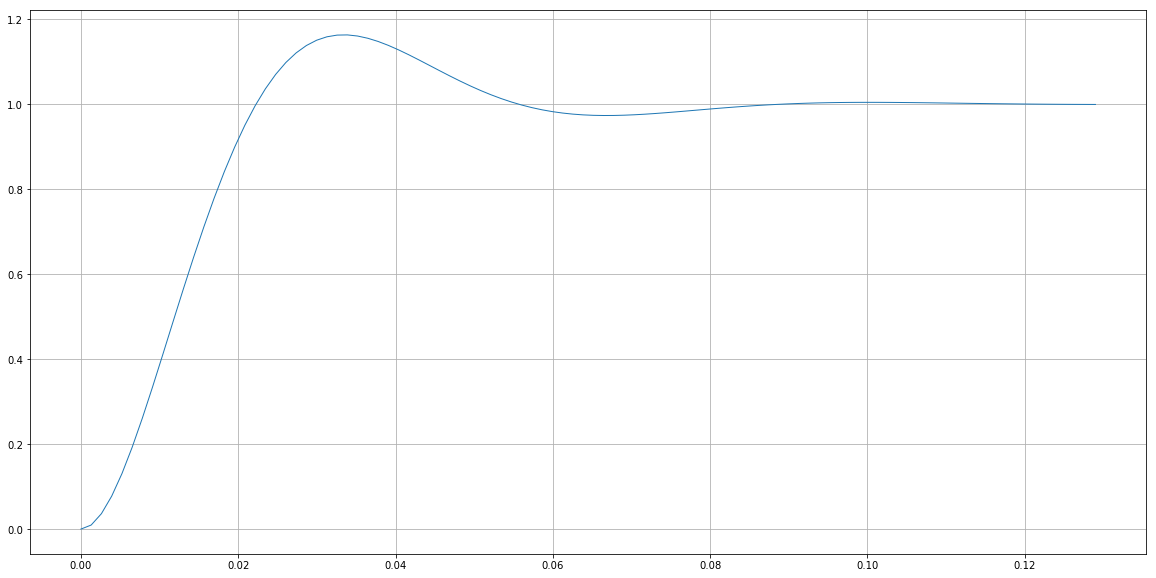

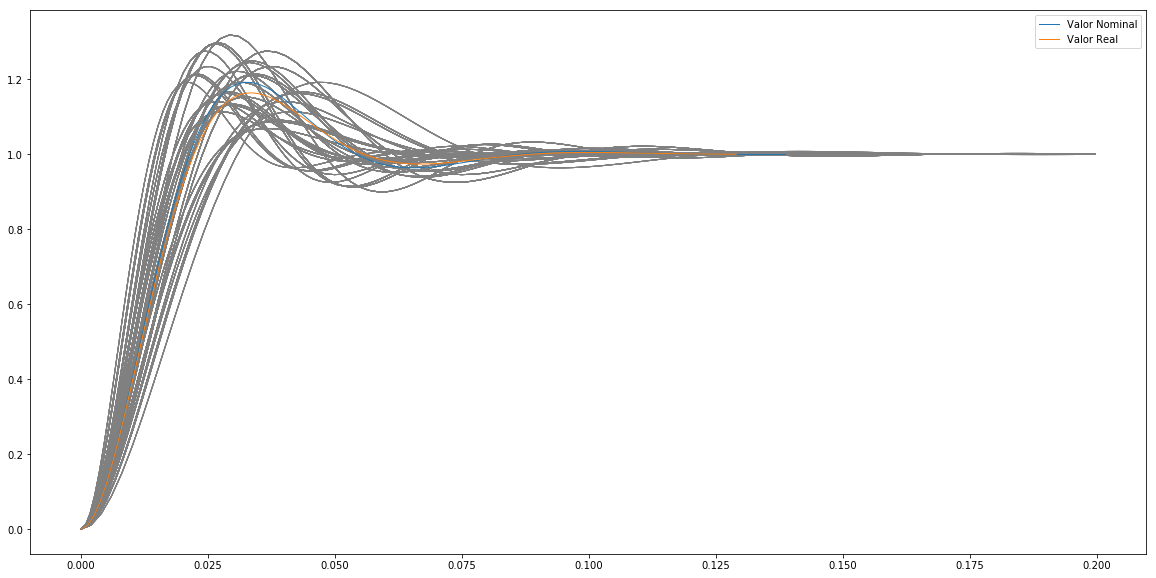

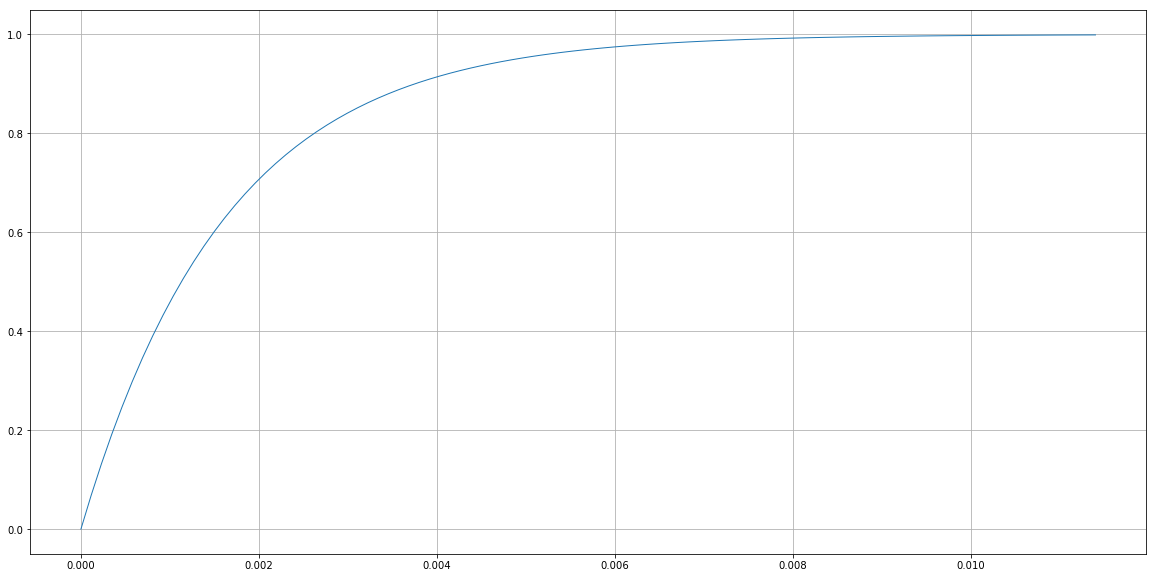

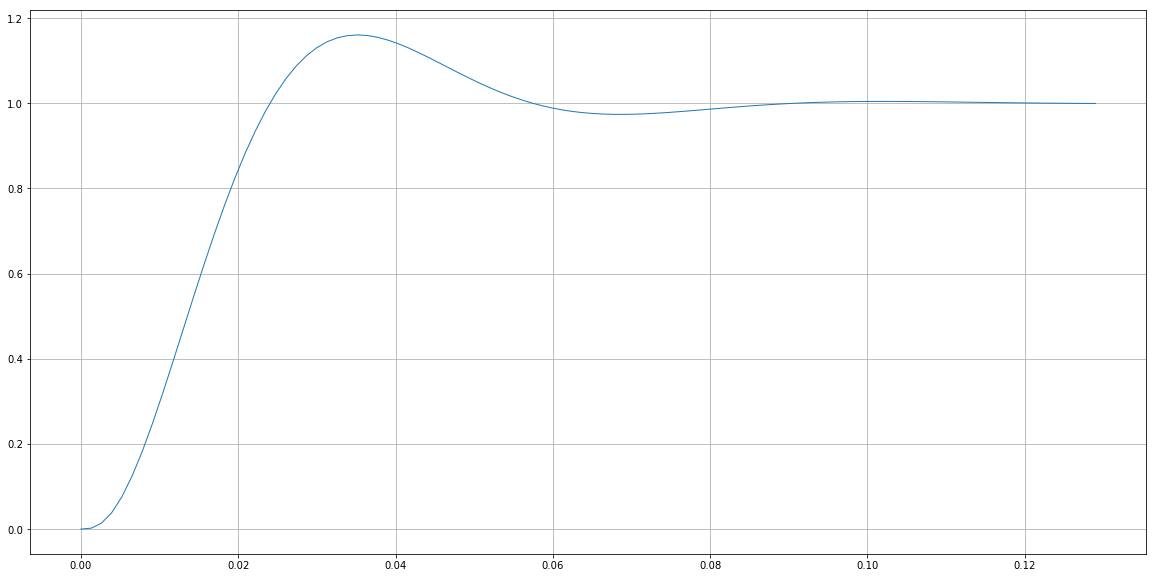

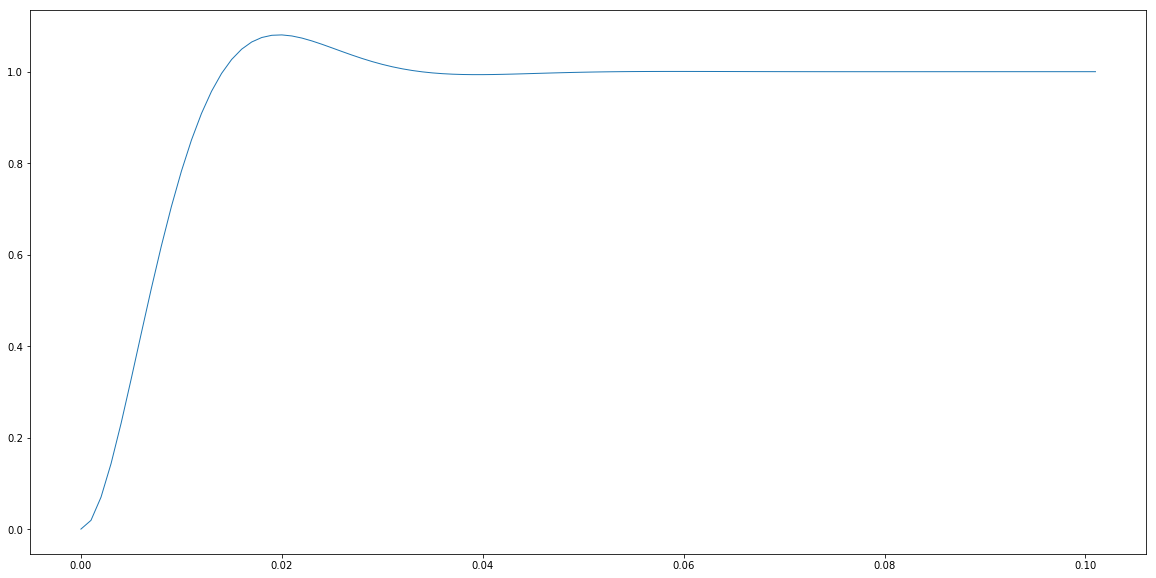

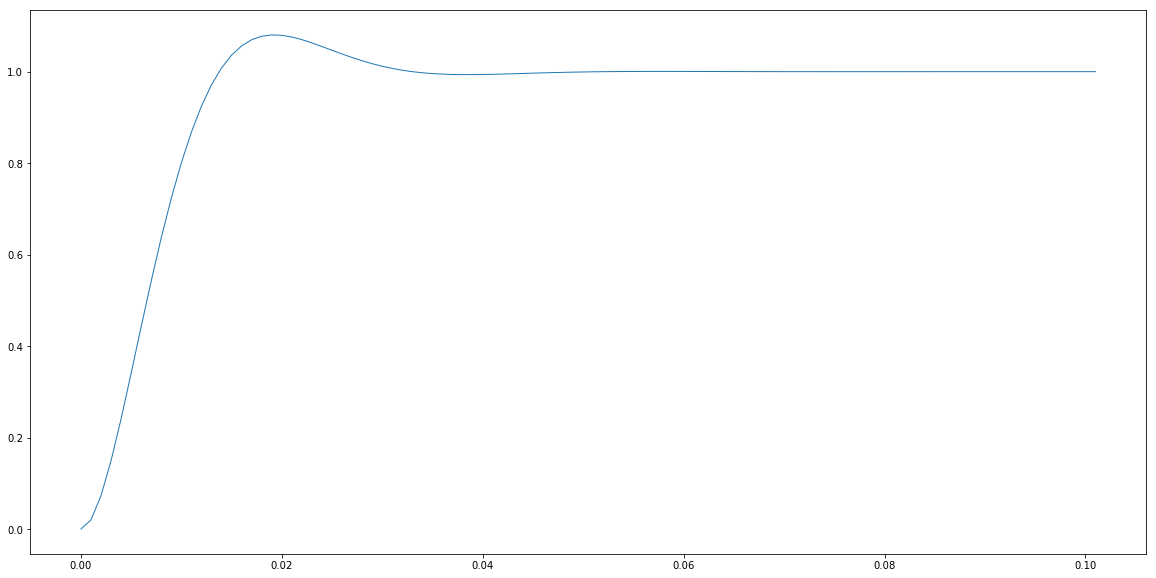

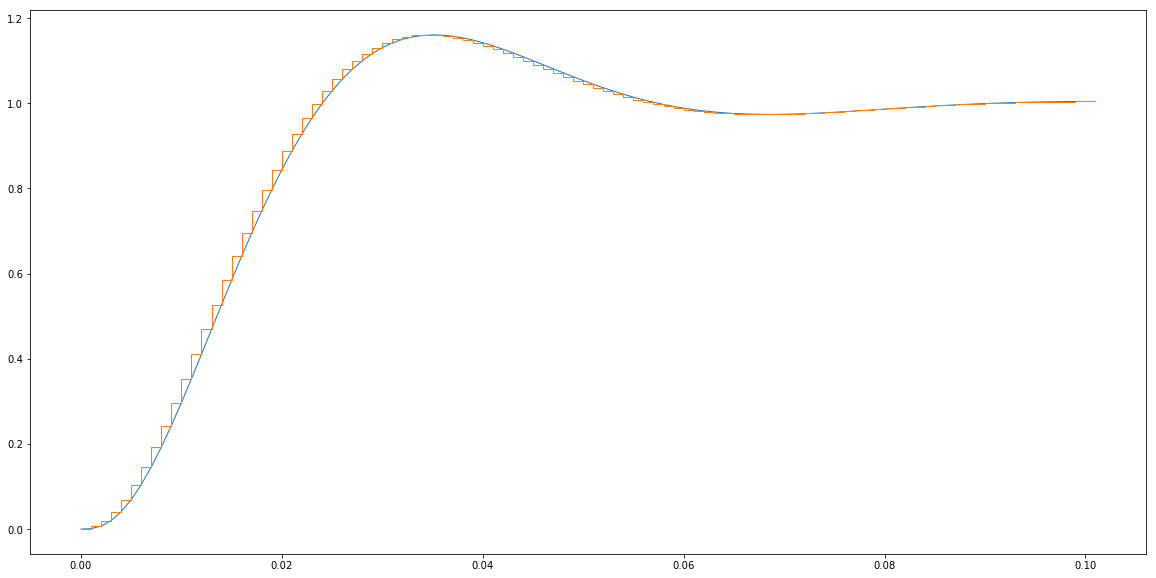

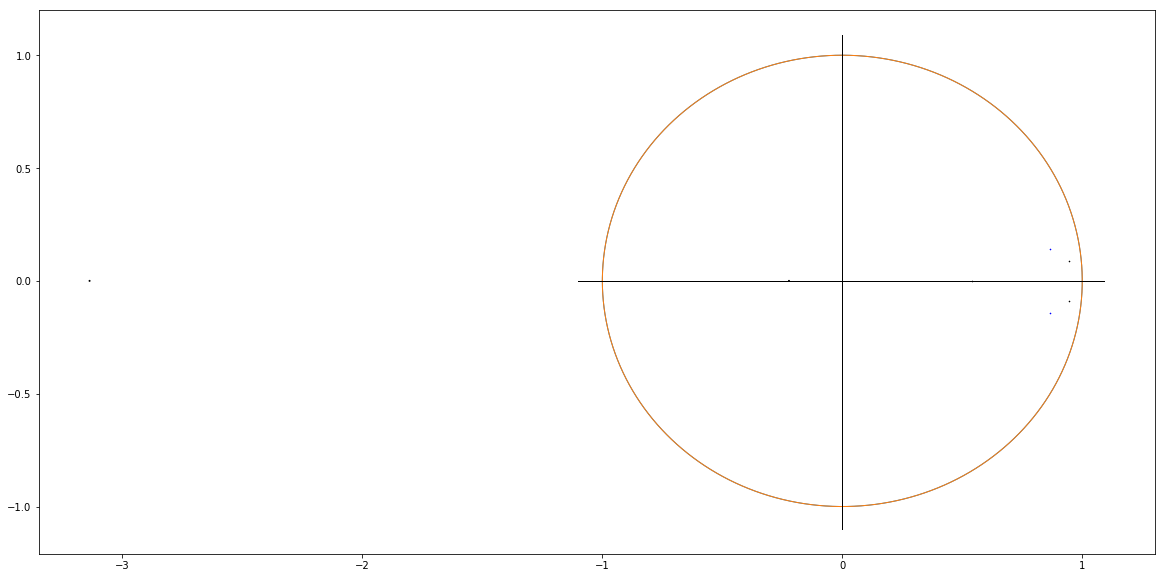

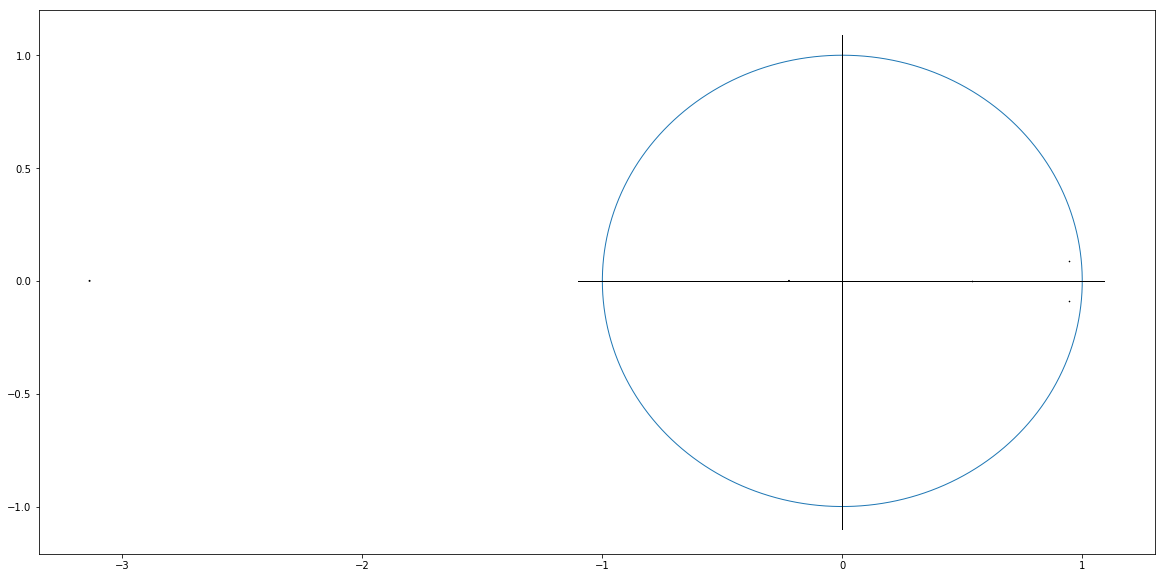

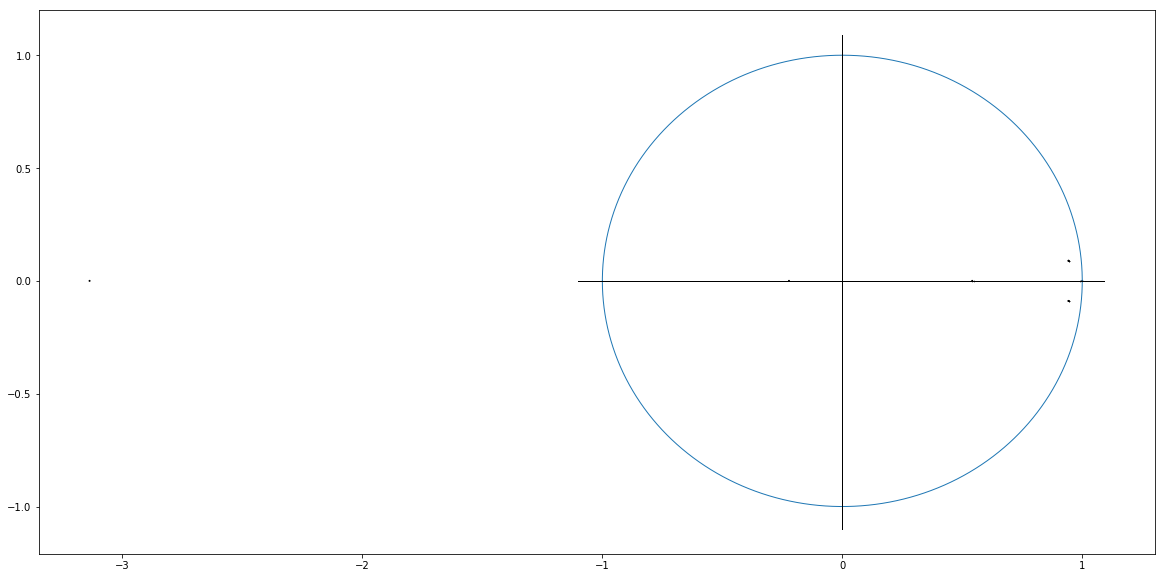

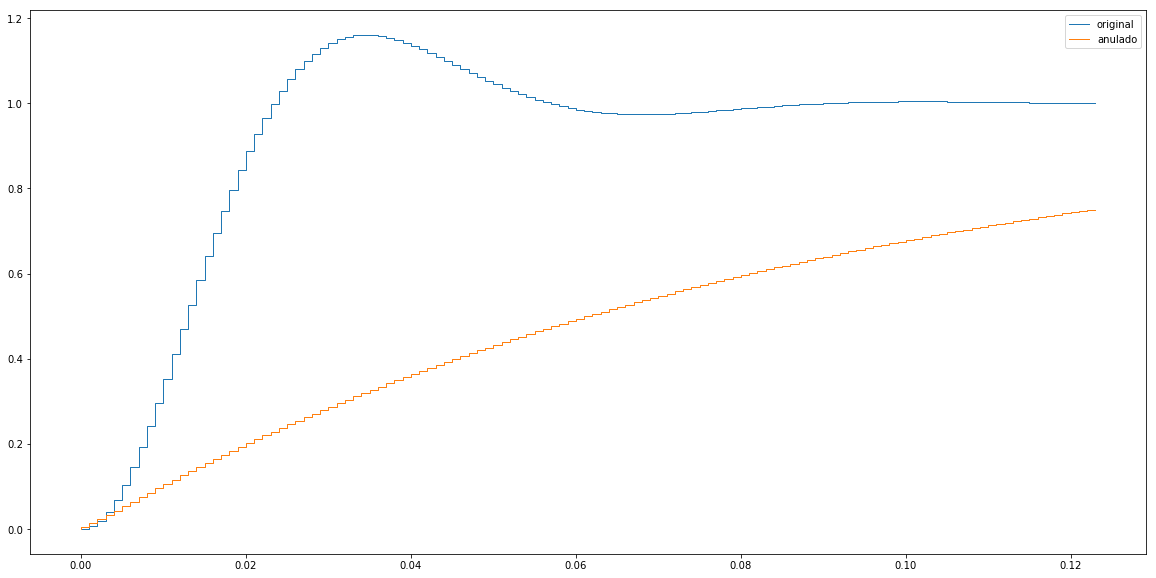

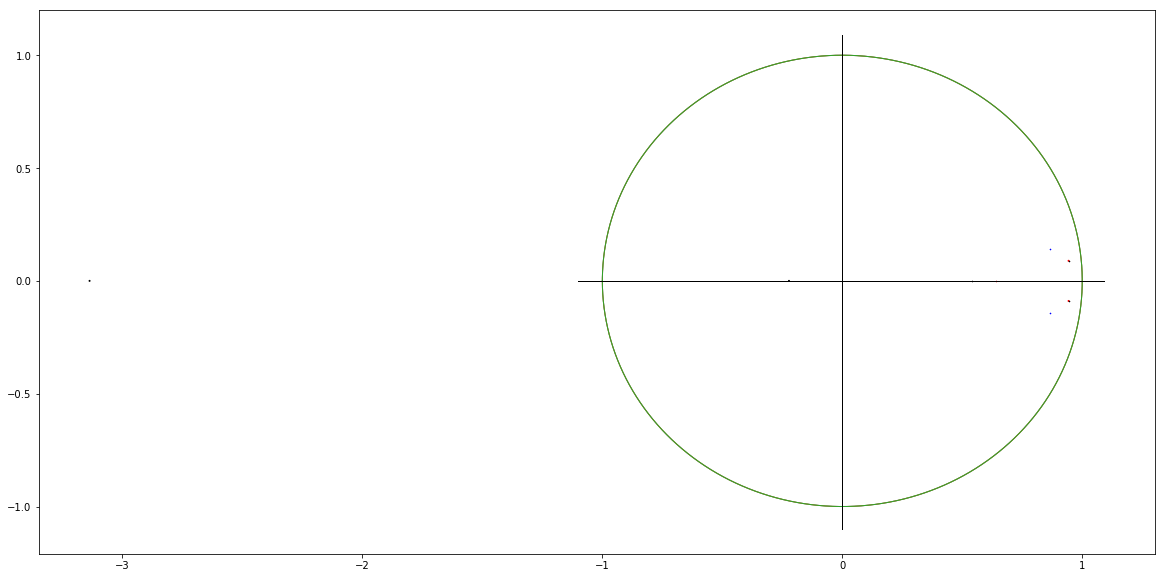

<Figure size 1440x720 with 0 Axes>

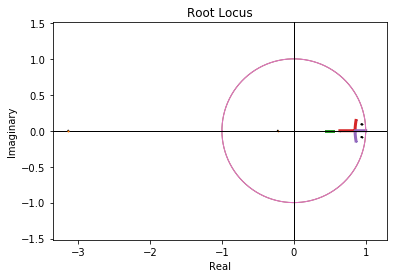

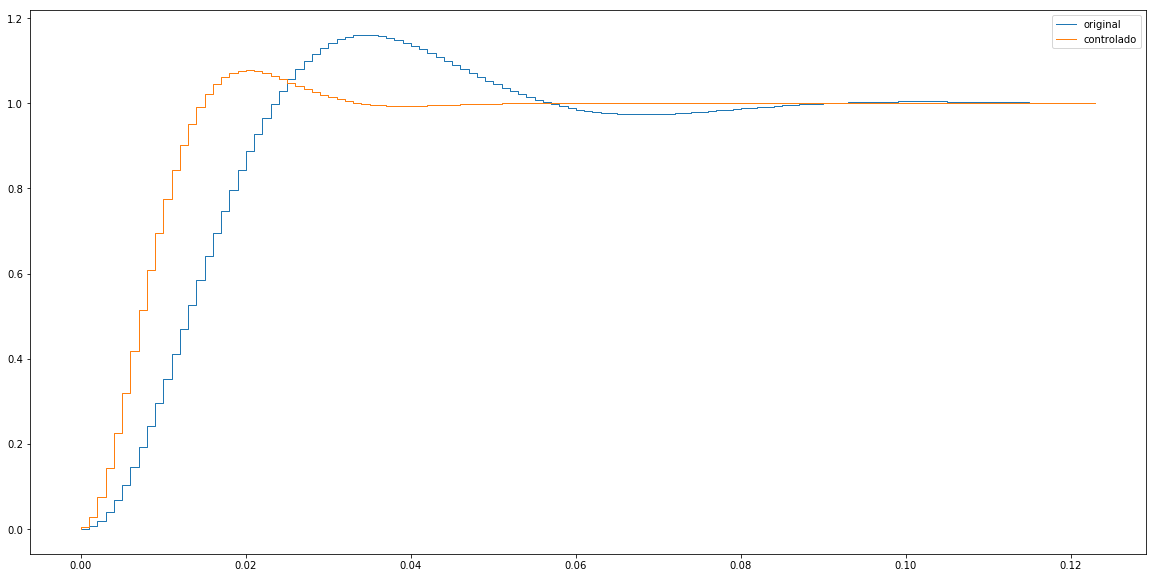

In [1]:
import import_ipynb
from planta import *
from requisitos import *
from controlador import *

# autoreload sets up auto reloading of modified .py modules
import autoreload
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

# Simulação com equações recursivas

In [2]:
Gd_b, Gd_a = tfdata(Gd_z)
Gd_b = np.array(Gd_b[0][0])
Gd_a = np.array(Gd_a[0][0])
Gd_b = Gd_b / Gd_a[0]
Gd_a = Gd_a / Gd_a[0]

G_b, G_a = tfdata(G_z)
G_b = np.array(G_b[0][0])
G_a = np.array(G_a[0][0])
G_b = G_b / G_a[0]
G_a = G_a / G_a[0]

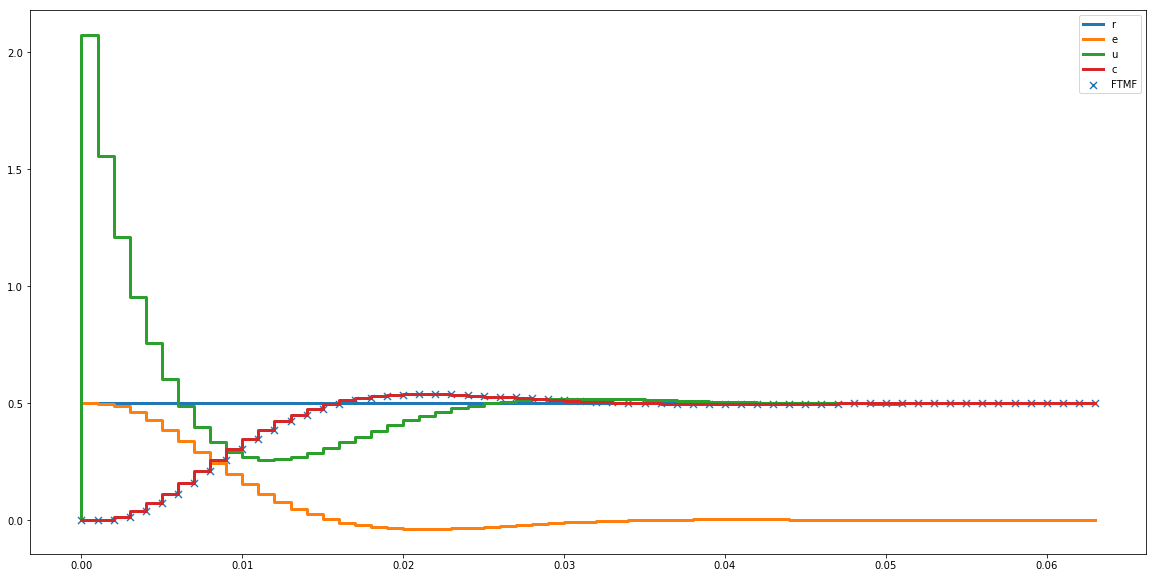

In [12]:
final_time = 2.5 * Req['SettlingTime']
T = np.arange(final_time / Ts) * Ts
kmax = T.size

r = np.array([0, *np.ones(kmax-1)]) * 0.5
e = np.zeros(kmax)
c = np.zeros(kmax)
u = np.zeros(kmax)
c[1] = G_b[0]*u[0] - G_a[1]*c[0]
e[1] = r[1] - c[1]
u[1] = Gd_b[0]*e[1] + Gd_b[1]*e[0] - Gd_a[1]*u[0]
c[2] = G_b[0]*u[1] + G_b[1]*u[0]  - G_a[1]*c[1] - G_a[2]*c[0]
e[2] = r[2] - c[2]
u[2] = Gd_b[0]*e[2] + Gd_b[1]*e[1] + Gd_b[2]*e[0] - Gd_a[1]*u[1] - Gd_a[2]*u[0]
k = 0
while k < kmax -3:
    c[k+3] = G_b[0]*u[k+2] + G_b[1]*u[k+1] + G_b[2]*u[k] - G_a[1]*c[k+2] - G_a[2]*c[k+1] - G_a[3]*c[k]
    e[k+3] = r[k+3] - c[k+3]
    u[k+3] = Gd_b[0]*e[k+3] + Gd_b[1]*e[k+2] + Gd_b[2]*e[k+1] - Gd_a[1]*u[k+2] - Gd_a[2]*u[k+1]
    k += 1

yout , _ , _ = lsim(FTMF, U=r, T=T)
    
# PlOTS
plt.figure(figsize=(20,10))
plt.step(T, r, lw=3)
plt.step(T, e, lw=3)
plt.step(T, u, lw=3)
plt.step(T, c, lw=3)
plt.scatter(T, yout, marker='x', lw=10)
plt.legend(['r', 'e', 'u', 'c', 'FTMF'])


# Simulando com quantização e saturaçao do ADC e DAC:

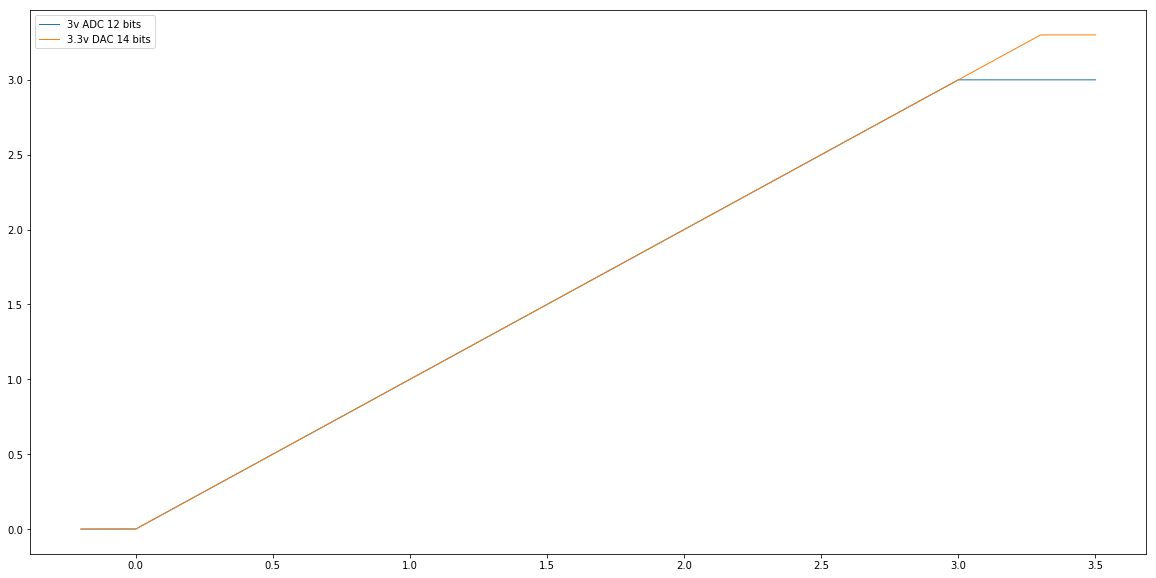

In [32]:
def quantize(x: np.float, b: int, v: np.float):
    x *= 2.**b / v
    return np.float((v / 2**b) * np.ceil(min([max(x, 0), 2**b])))

badc = 12
vadc = 3
bdac = 14
vdac = 3.3

x = np.linspace(-0.2, 3.5, 10000)
adc = np.zeros(len(x))
dac = np.zeros(len(x))
i = 0
while i < len(x):
    adc[i] = quantize(x[i], badc, vadc)
    dac[i] = quantize(x[i], bdac, vdac)
    i += 1
plt.figure(figsize=(20,10))
plt.plot(x, adc, lw=1)
plt.plot(x, dac, lw=1)
plt.legend([f'{vadc}v ADC {badc} bits', f'{vdac}v DAC {bdac} bits'])

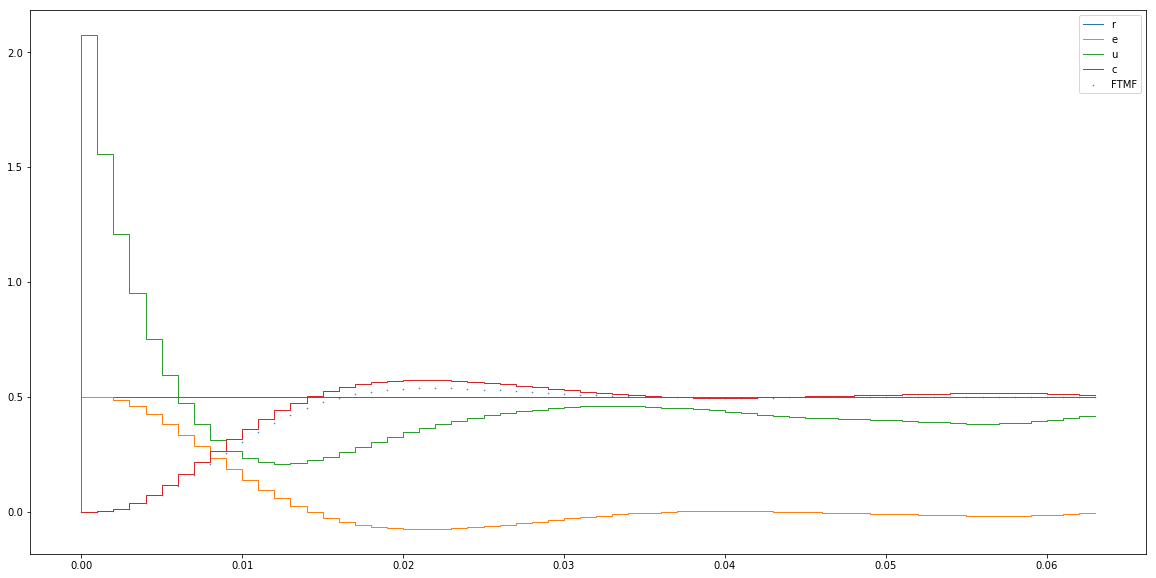

In [18]:
final_time = 2.5 * Req['SettlingTime']
T = np.arange(final_time / Ts) * Ts
kmax = T.size

r = np.array([0, *np.ones(kmax-1)]) * 0.5
e = np.zeros(kmax)
c = np.zeros(kmax)
u = np.zeros(kmax)
c[1] = G_b[0]*u[0] - G_a[1]*c[0]
e[1] = r[1] - c[1]
u[1] = Gd_b[0]*e[1] + Gd_b[1]*e[0] - Gd_a[1]*u[0]
c[2] = G_b[0]*u[1] + G_b[1]*u[0]  - G_a[1]*c[1] - G_a[2]*c[0]
e[2] = r[2] - c[2]
u[2] = Gd_b[0]*e[2] + Gd_b[1]*e[1] + Gd_b[2]*e[0] - Gd_a[1]*u[1] - Gd_a[2]*u[0]
k = 0
while k < kmax -3:
    c[k+3] = quantize(G_b[0]*u[k+2] + G_b[1]*u[k+1] + G_b[2]*u[k] - G_a[1]*c[k+2] - G_a[2]*c[k+1] - G_a[3]*c[k], badc, vadc)
    e[k+3] = r[k+3] - c[k+3]
    u[k+3] = quantize(Gd_b[0]*e[k+3] + Gd_b[1]*e[k+2] + Gd_b[2]*e[k+1] - Gd_a[1]*u[k+2] - Gd_a[2]*u[k+1], bdac, vdac)
    k += 1

yout , _ , _ = lsim(FTMF, U=r, T=T)
    
# PlOTS
plt.figure(figsize=(20,10))
plt.step(T, r)
plt.step(T, e)
plt.step(T, u)
plt.step(T, c)
plt.scatter(T, yout, marker='.')
plt.legend(['r', 'e', 'u', 'c', 'FTMF'])

## Simulação de uma implementação em um microcontrolador -> modo 1

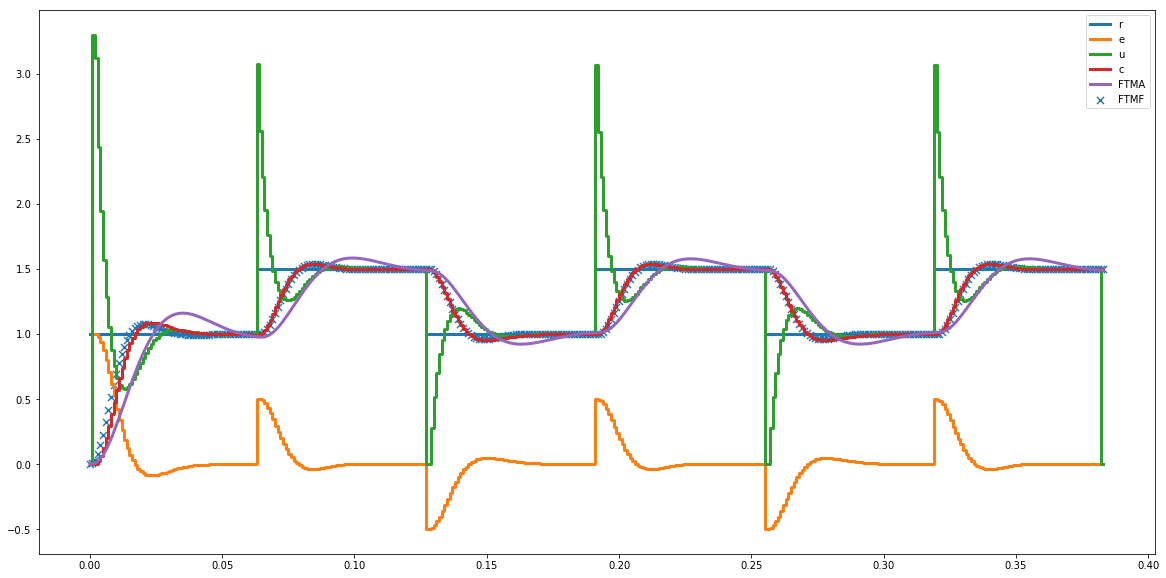

In [30]:
k = 0
r_ = np.array([*np.ones(kmax), *np.ones(kmax) * 1.5, *np.ones(kmax), *np.ones(kmax) * 1.5, *np.ones(kmax), *np.ones(kmax) * 1.5])
T = np.arange(len(r_)) * Ts
e_ = np.zeros(len(r_))
c_ = np.zeros(len(r_))
u_ = np.zeros(len(r_))
r = np.zeros(3)
e = np.zeros(3)
c = np.zeros(3)
u = np.zeros(3)
while k < len(r_) -3:
    ## ENTRADAS
    r[2] = quantize(r_[k+2], badc, vadc)  # leitura da referência
    c[2] = quantize(c_[k+2], badc, vadc)  # leitura da saída
    
    ## MALHA DE CONTROLE
    e[2] = r[2] - c[2]
    u[2] = Gd_b[0]*e[2] + Gd_b[1]*e[1] + Gd_b[2]*e[0] - Gd_a[1]*u[1] - Gd_a[2]*u[0];
    u_[k+2] = quantize(u[2], bdac, vdac)
    
    ## PLANTA 
    c_[k+3] = G_b[0]*u_[k+2] + G_b[1]*u_[k+1] + G_b[2]*u_[k] - G_a[1]*c_[k+2] - G_a[2]*c_[k+1] - G_a[3]*c_[k];
    e_[k+2] = e[2];
    
    ## RECICLO
    e[0] = e[1];
    c[0] = c[1];
    u[0] = u[1];
    e[1] = e[2];
    c[1] = c[2];
    u[1] = u[2];
    k += 1

yout_FTMF, _ , _ = lsim(FTMF, U=r_, T=T)
yout_G_z, _ , _ = lsim(G_z, U=r_, T=T)
    
# PlOTS
plt.figure(figsize=(20,10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, e_, lw=3, label='e')
plt.step(T, u_, lw=3, label='u')
plt.step(T, c_, lw=3, label='c')
plt.scatter(T, yout_FTMF, marker='x', lw=10, label='FTMF')
plt.plot(T, yout_G_z, lw=3, label='FTMA')
plt.legend()

## Simulação de uma implementação em um microcontrolador -> modo 2

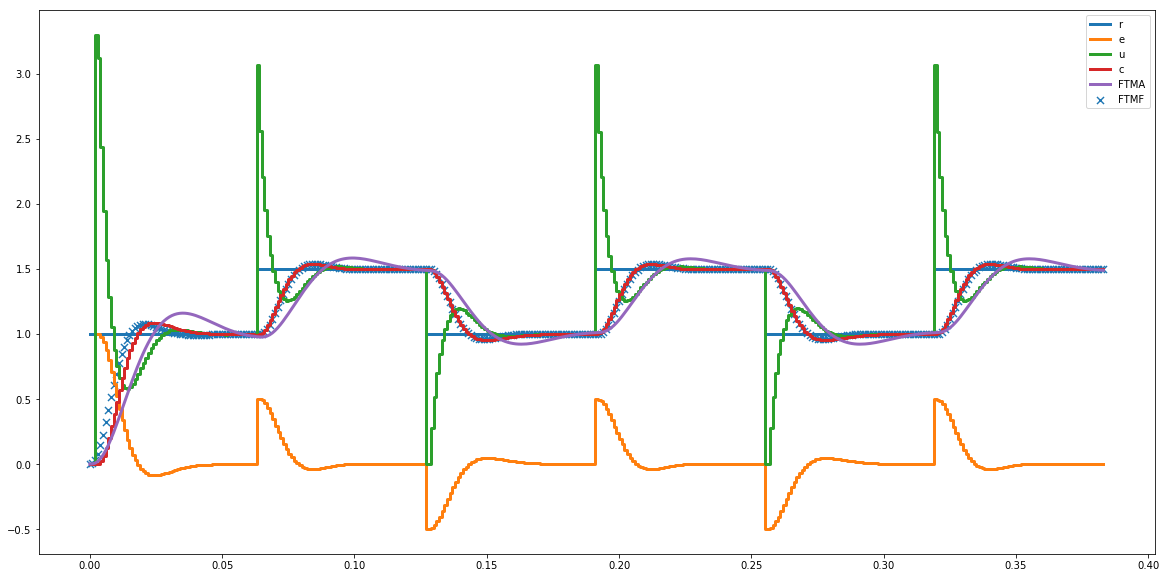

In [28]:
def noise(x: float, maximum: float = 1):
    return x + np.random.ranf()*maximum

k = 0
r_ = np.array([*np.ones(kmax), *np.ones(kmax) * 1.5, *np.ones(kmax), *np.ones(kmax) * 1.5, *np.ones(kmax), *np.ones(kmax) * 1.5])
T = np.arange(len(r_)) * Ts
e_ = np.zeros(len(r_))
c_ = np.zeros(len(r_))
u_ = np.zeros(len(r_))
r = np.zeros(4)
e = np.zeros(4)
c = np.zeros(4)
u = np.zeros(4)
while k < len(r_) -3:
    ## PLANTA
    c_[k+3] = G_b[0]*u_[k+2] + G_b[1]*u_[k+1] + G_b[2]*u_[k] - G_a[1]*c_[k+2] - G_a[2]*c_[k+1] - G_a[3]*c_[k];
    
#     c_[k+3] = noise(c_[k+3], 0.01)
    
    ## ENTRADAS
    r[3] = quantize(r_[k+3], badc, vadc)  # leitura da referência
    c[3] = quantize(c_[k+3], badc, vadc)  # leitura da saída
    
    ## CONTROLE
    e[3] = r[3] - c[3];
    u[3] = Gd_b[0]*e[3] + Gd_b[1]*e[2] + Gd_b[2]*e[1] - Gd_a[1]*u[2] - Gd_a[2]*u[1];
    
    ## SAÍDAS
    u_[k+3] = quantize(u[3], bdac, vdac)
    e_[k+3] = e[3];
    
    ## RECICLO
    e[0] = e[1];
    c[0] = c[1];
    u[0] = u[1];
    e[1] = e[2];
    c[1] = c[2];
    u[1] = u[2];
    e[2] = e[3];
    c[2] = c[3];
    u[2] = u[3];
    k += 1

yout_FTMF, _ , _ = lsim(FTMF, U=r_, T=T)
yout_G_z, _ , _ = lsim(G_z, U=r_, T=T)
    
# PlOTS
plt.figure(figsize=(20,10))
plt.step(T, r_, lw=3, label='r')
plt.step(T, e_, lw=3, label='e')
plt.step(T, u_, lw=3, label='u')
plt.step(T, c_, lw=3, label='c')
plt.scatter(T, yout_FTMF, marker='x', lw=10, label='FTMF')
plt.plot(T, yout_G_z, lw=3, label='FTMA')
plt.legend()

## Variáveis para o firmware do microcontrolador

In [21]:
boversample = 2;
vadc = 3;
badc = 12
badcos = badc +boversample;
adc_ratio = vadc / pow(2, badc);
adcos_ratio = vadc / (pow(2, badcos +boversample));
oversample_frequency_ratio = pow(4, boversample);
Fos = Fs * oversample_frequency_ratio;
Ts = 1 / Fs;
Tos = 1 / Fos;

print(f'boversample = {boversample}')
print(f'vadc = {vadc}')
print(f'badc = {badc}')
print(f'badcos = {badcos}')
print(f'adc_ratio = {adc_ratio}')
print(f'oversample_frequency_ratio = {oversample_frequency_ratio}')
print(f'Fs = {Fs}')
print(f'Fos = {Fos}')
print(f'Ts = {Ts}')
print(f'Tos = {Tos}')

print(f'volatile const double period = {Ts};')

print(f'volatile const double G_b[{len(G_b)}] = {{')
for b in G_b[:-1]:
    print("\t{:+.60f}, \t\\\n".format(b), end='')
print("\t{:+.60f}\n}};".format(G_b[-1]))

print(f'volatile const double G_a[{len(G_a)}] = {{')
for a in G_a[:-1]:
    print("\t{:+.60f}, \t\\\n".format(a), end='')
print("\t{:+.60f}\n}};".format(G_a[-1]))

print(f'volatile const double Gd_b[{len(Gd_b)}] = {{')
for b in Gd_b[:-1]:
    print("\t{:+.60f}, \t\\\n".format(b), end='')
print("\t{:+.60f}\n}};".format(Gd_b[-1]))

print(f'volatile const double Gd_a[{len(Gd_a)}] = {{')
for a in Gd_a[:-1]:
    print("\t{:+.60f}, \t\\\n".format(a), end='')
print("\t{:+.60f}\n}};".format(Gd_a[-1]))

boversample = 2
vadc = 3
badc = 12
badcos = 14
adc_ratio = 0.000732421875
oversample_frequency_ratio = 16
Fs = 1000
Fos = 16000
Ts = 0.001
Tos = 6.25e-05
volatile const double period = 0.001;
volatile const double G_b[3] = {
	+0.001012807017875871906653628684580326080322265625000000000000, 	\
	+0.003402360773457235865180336986668407917022705078125000000000, 	\
	+0.000706068067583276448573315065004862844944000244140625000000
};
volatile const double G_a[4] = {
	+1.000000000000000000000000000000000000000000000000000000000000, 	\
	-2.427239465460885980974126141518354415893554687500000000000000, 	\
	+1.917943608960099410865041136275976896286010742187500000000000, 	\
	-0.485582907640297600782020026599639095366001129150390625000000
};
volatile const double Gd_b[3] = {
	+4.148765765461027044125330576207488775253295898437500000000000, 	\
	-7.824541023678916573658170818816870450973510742187500000000000, 	\
	+3.722089522017093088379624532535672187805175781250000000000000
};
volatile const double